    Для выполнения данной лабораторной работы будем использовать данные об отзывах клиентов магазина, которые совершили покупки.
    Для начала импортируем DataSet и посмотрим на "шапку". Параметр sep зададим, чтобы использовать разделитель, отличный от стандартного - в нашем случае это запятая.

In [2]:
import pandas as pd
import numpy as np

    Отметим, что при таком импорте DataSet необходимо разместить файл с DataSet в том же месте (в той же директории и папке), что и проект Jupyter notebook.

In [3]:
df = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')

In [4]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


    Для начала удалим дубликаты, так как дублирующие записи искажают показатели DataSet. Но перед удалением дубликатов обязательно узнаем, сколько записей находится в DataSet.

In [5]:
df.shape

(99224, 7)

Посмотрим краткую информацию обо всех параметрах датасета

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


В выбранном датасете находятся преимущественно данные строкового типа, а также целочисленного. Проверим датасет на наличие дубликатов

In [7]:
df = df.drop_duplicates()
df.shape

(99224, 7)

    Видно, что Pandas не нашел ни одного дубликата

    Обработка пропусков!
    Помним,что если у признака более 70% пропусков, то такой признак удаляют. Поэтому проверим, насколько наши признаки полны.


In [8]:
column_values = df[['order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date']].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['73fc7af87114b39712e6da79b0a377eb' 4 nan ...
 '7725825d039fc1f0ceb7635e3f7d9206' '90531360ecb1eec2a1fbb265a0db0508'
 'meu produto chegou e ja tenho que devolver, pois está com defeito , não segurar carga']


    Существует несколько способов обозначить пропуски, и зачастую создатели датасета не описывают данные в достаточной мере, и определять, как обозначены пропуски, приходится вручную. 
    Например:

    1) NaN / NaT (упрощенно: "не число" / "не время")
    2) Пустая ячейка
    3) Для числовых признаков – радикальный выброс. К примеру, для столбца "День" это число 999.
    4) Маркер или нестандартный символ
    
    Встроенные методы Pandas позволяют с легкостью справиться с первыми двумя разновидностями таких пробелов. Разберемся для начала с категориальными переменными, объединив их в один список.

In [9]:
df = df.replace({"День": 999,
                 "order_id": "Неизвестно",
                 "review_score": "Неизвестно",
                 "review_comment_title": "Неизвестно",
                 "review_comment_message": "Неизвестно",
                 "review_creation_date": "Неизвестно",
                 }, np.nan)

df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


    Среди всех признаков 88% пропусков находится у признака "review_comment_title" и почти 59% - у "review_comment_message", первый признак поделжит удалению.

In [10]:
df.isnull().mean() * 100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [11]:
df = df.drop(columns=['review_comment_title'])
df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


    Процесс обработки пропусков, к счастью, можно сократить с помощью sklearn.impute.SimpleImputer. Мы выбираем все категориальные переменные и применяем стратегию "[вставить вместо пропуска] самое распространенное значение":

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df["order_id"] = imputer.fit_transform(df["order_id"].values.reshape(-1,1))[:,0]

df["review_comment_message"] = imputer.fit_transform(df["review_comment_message"].values.reshape(-1,1))[:,0]

df["review_creation_date"] = imputer.fit_transform(df["review_creation_date"].values.reshape(-1,1))[:,0]

df["review_answer_timestamp"] = imputer.fit_transform(df["review_answer_timestamp"].values.reshape(-1,1))[:,0]

    Подобным образом заполняются пустоты в числовых переменных, только стратегия теперь – "вставить среднее значение".

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df["review_score"] = imputer.fit_transform(df["review_score"].values.reshape(-1,1))[:,0]

In [14]:
df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,Muito bom,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,Muito bom,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,Muito bom,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Масштабирование данных

<AxesSubplot:xlabel='review_score', ylabel='Count'>

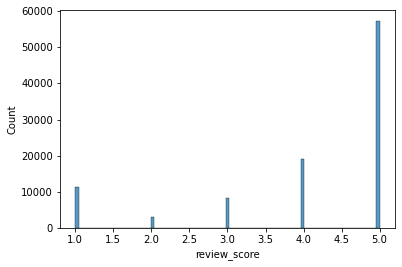

In [15]:
import seaborn as sns

sns.histplot(df['review_score'])

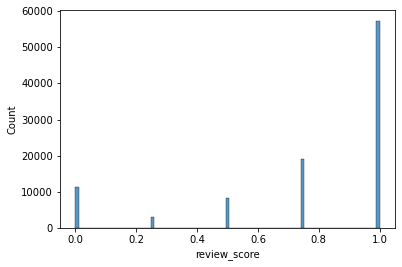

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

df['review_score'] = MinMaxScaler().fit_transform(df['review_score'].values.reshape(-1, 1))
sns.histplot(df['review_score']);

Кодирование категориальных признаков

In [17]:
df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,0.75,Muito bom,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,1.00,Muito bom,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,1.00,Muito bom,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,1.00,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,1.00,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
def find_cat(df):
    for name in df.columns:
        s = ''
        s += name
        if(type(df[name][0]) == str):
            s += ' строка,'
            if(df[name].nunique() <= 3):
                s += ' мало уникальных'
                if(s != name):
                    print (s)

find_cat(df)
df.head

<bound method NDFrame.head of                               review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score                          

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.order_id)
df['order_id_le'] = le.transform(df.order_id)
df

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,Hours,order_id_le
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,0.75,Muito bom,2018-01-18 00:00:00,2018-01-18 21:46:59,20,44692
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,1.00,Muito bom,2018-03-10 00:00:00,2018-03-11 03:05:13,20,63412
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,1.00,Muito bom,2018-02-17 00:00:00,2018-02-18 14:36:24,20,96304
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,1.00,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,20,39089
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,1.00,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,20,54600
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,1.00,Muito bom,2018-07-07 00:00:00,2018-07-14 17:18:30,20,16272
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,1.00,Muito bom,2017-12-09 00:00:00,2017-12-11 20:06:42,20,13435
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,1.00,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,20,33099
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,0.75,Muito bom,2018-07-01 00:00:00,2018-07-02 12:59:13,20,45831
